# outlier

In [1]:
# ther is a data between 1 to 6 and sudden there is data of 13 then 13 is a outlier4.ipynb
# now we set how to detect oulier and how to remove it 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data = sns.load_dataset("tips")
data.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [4]:
data.info()
# is sa hm dakhain ga ka isma koi null value present ha ya nhi 
# bcz sari hi 244 pori values hin 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [2]:
data.describe()
# ab ye dakhain min 3 max 50 or mean 19 ha to itna diff matlb outlier ha same as tip isma b ha 

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


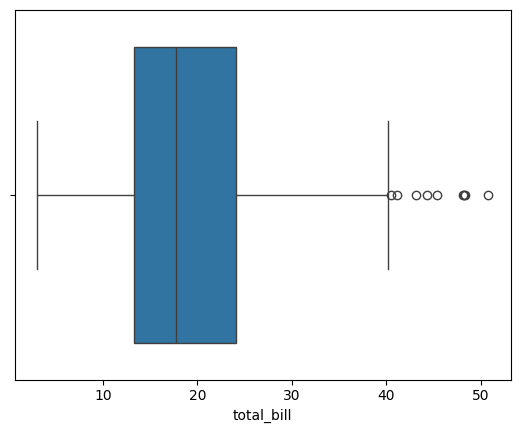

In [4]:
sns.boxplot(x = "total_bill", data = data)
plt.show()
# ye isma outlier show ho gya asa hm find krta hain 

C:\Users\R c\AppData\Local\Temp\ipykernel_5728\2663232036.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[ "total_bill"])


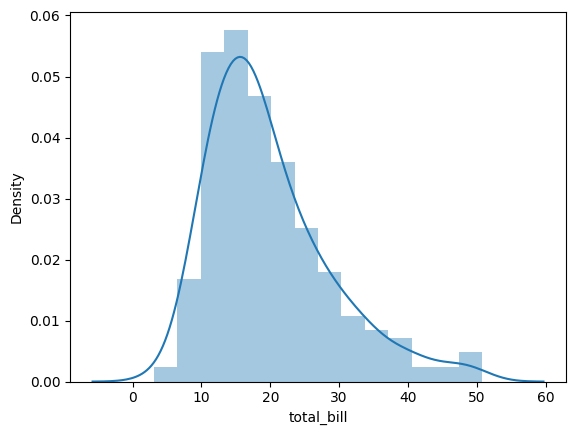

In [5]:
# ab distribution plot ka through b outlier find kr sakta haagr n_
sns.distplot(data[ "total_bill"])
plt.show()

In [8]:
# ab ye iski tail boht lambi ja ray ha mean isma oulier ha  on blue register 
data.shape # is sa hma pta chala ga ka isma kitne rows or kitne columns hain 

(244, 7)

In [6]:
q1 = data["total_bill"].quantile(0.25) #is sa hm q1 nikl lain ga 0.25 measn 25 per
q3 = data["total_bill"].quantile(0.75) # ye sara formulas blue register ma ha 
q3,q1 # ye hm opr sa describe func ma check b kr sakta hain 
IQR = q3 - q1 # interquartle range
IQR

np.float64(10.779999999999998)

In [7]:
min_range = q1 - (1.5 * IQR) # blue reg
max_range = q3 +(1.5*IQR) # blue reg hm opr grapgh ma dakh sakta ha outlier 40 ka bd a ra ha dosra -  ma is liye usko neglect kr dain ga 
max_range ,min_range

(np.float64(40.29749999999999), np.float64(-2.8224999999999945))

In [23]:
# ab hm ye dakhain ga orignl data sa oulier ko kasa remove kr sakta ha 
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


# how to remove outlier through direct method

In [10]:
#  isma hm apni max range sa kam ka data la lain ga 
new_data = data[data["total_bill"]<=max_range] # is tariqa sa hm max range sa kam ka data la lain ga total bill ka 
new_data # max_range ye wahin wala ha jo hmna opr nikali thi range

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [12]:
new_data.shape # isma kam ho gay mean data change ho ka kam rah gya 

(235, 7)

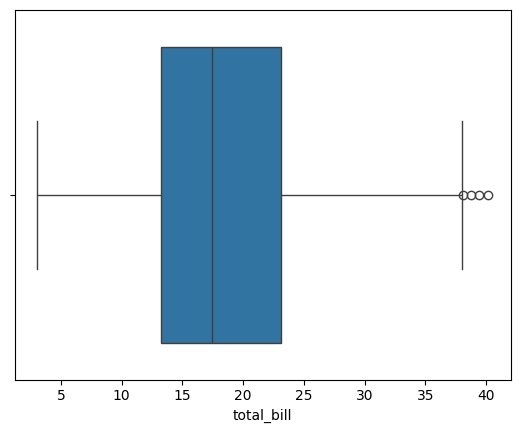

In [14]:
# dakhna ka liye dobara box plot bnain ga 
sns.boxplot(x = "total_bill", data = new_data)
plt.show() 
# itna ko outlier rah sakta ha ye min ha 

In [ ]:
# outlier kam hi hatana chaheye jasa ka decision tress outlier pa affect nhi krta lakin linear rgression
# ma boht affect krta ha 

# outlier removal using z score

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data = sns.load_dataset("titanic")
data.head(12)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [18]:
# first check if null value is presentab
data.isnull().sum()
data.shape

(891, 15)

In [6]:
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<function matplotlib.pyplot.show(close=None, block=None)>

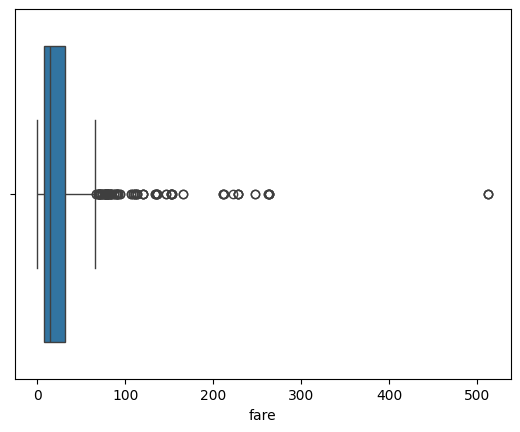

In [2]:
# check min mean and max to find that outlier is present or noct
sns.boxplot(x = "fare", data = data)
plt.show

C:\Users\R c\AppData\Local\Temp\ipykernel_4384\3934646165.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["fare"]) # ab ye nicha iski tail boht lambi ja ray ha mean outlier present ha


<Axes: xlabel='fare', ylabel='Density'>

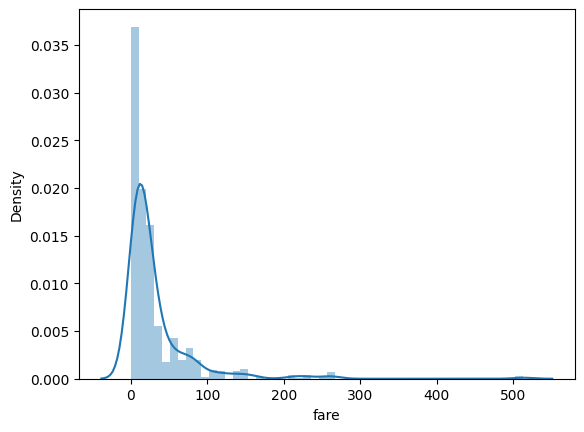

In [3]:
# mazeed hm distribution plot ka through check krain ga 
sns.distplot(data["fare"]) # ab ye nicha iski tail boht lambi ja ray ha mean outlier present ha 

In [4]:
# ab hm z score ka through outlier remove krain ga uska liye hm formula lagain ga ss attach ha 
min_range = data["fare"].mean() - 3*data["fare"].std()
max_range = data["fare"].mean() + 3*data["fare"].std()
min_range,max_range # ye hmna formula ka through min or max dono range find kr li ha ss attach and opr explain ha 

(np.float64(-116.87607782296804), np.float64(181.2844937601173))

In [5]:
# ab hmna jo b max range ka bhr ka data ha wo remove krna haabs
new1_data = data[data["fare"]<=max_range]

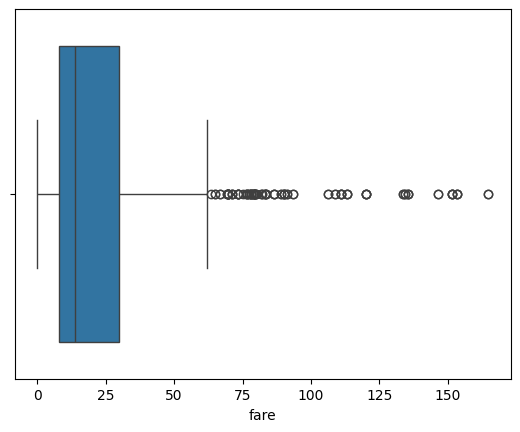

In [6]:
# ab box plot ma dakhain ga kya ye thiq habs
sns.boxplot(x = "fare", data = new1_data)
plt.show()

In [19]:
new1_data.shape,data.shape # data before and after removing outlier

((871, 15), (891, 16))


# how to remove outlier through z score

In [15]:
# sbsa pahla z score ki valuae nikal lata hain 
z_score = (data["fare"] - data["fare"].mean()) / (data["fare"].std()) # freom formula of z_score ss attach
z_score>3 # check krain ga knsa >3 ha or knsa <-3 through z score formula 

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: fare, Length: 891, dtype: bool

In [17]:
# ab isko  ordinal data ma place kr dain ga hm apna data ka andr jo b z score aya us ccolumn ko add krain ga 
data["z_score"] = z_score
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,z_score
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,-0.502163
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,0.786404
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,-0.488580
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0.420494
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,-0.486064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,-0.386454
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,-0.044356
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,-0.176164
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,-0.044356


In [18]:
# ye place ho gya ha 
data[data["z_score"]<3] # z_table ka andr likha ha >3 or<-3 pa oulier hota ha 

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,z_score
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,-0.502163
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,0.786404
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,-0.488580
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0.420494
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,-0.486064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,-0.386454
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,-0.044356
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,-0.176164
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,-0.044356


In [ ]:
# so ye ab hmara outlier wala data del ho gya ha or direct or z score dono method ka reult same ata ha 